<a href="https://colab.research.google.com/github/KAMBLE/ChatBot/blob/master/Time_Series_Analysis_ARIMA_(stock_market).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [6]:
data = pd.read_csv("/content/sample_data/NSE-BSE.csv")
print(data.head())
print('Data types\n')
print(data.dtypes)

         Date   Open    High    Low    Last   Close  Total Trade Quantity  \
0  2018-09-28  707.0  707.95  681.0  682.65  683.10              131700.0   
1  2018-09-27  716.8  723.50  691.1  697.80  697.15              156222.0   
2  2018-09-26  720.0  724.40  709.0  710.00  711.60               71780.0   
3  2018-09-25  725.0  725.00  710.5  715.00  718.15               93181.0   
4  2018-09-24  725.3  728.00  712.0  721.00  721.90              126374.0   

   Turnover (Lacs)  
0           910.52  
1          1104.25  
2           513.48  
3           668.03  
4           911.15  
Data types

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object


In [0]:
df = data[['Date','Close']]

In [18]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv("/content/sample_data/NSE-BSE.csv", parse_dates=['Date'], index_col='Date',date_parser=dateparse)
print(data.head())
print(data.dtypes)

             Open    High    Low    Last   Close  Total Trade Quantity  \
Date                                                                     
2018-09-28  707.0  707.95  681.0  682.65  683.10              131700.0   
2018-09-27  716.8  723.50  691.1  697.80  697.15              156222.0   
2018-09-26  720.0  724.40  709.0  710.00  711.60               71780.0   
2018-09-25  725.0  725.00  710.5  715.00  718.15               93181.0   
2018-09-24  725.3  728.00  712.0  721.00  721.90              126374.0   

            Turnover (Lacs)  
Date                         
2018-09-28           910.52  
2018-09-27          1104.25  
2018-09-26           513.48  
2018-09-25           668.03  
2018-09-24           911.15  
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object


In [21]:
data.columns
data.index

DatetimeIndex(['2018-09-28', '2018-09-27', '2018-09-26', '2018-09-25',
               '2018-09-24', '2018-09-21', '2018-09-19', '2018-09-18',
               '2018-09-17', '2018-09-14',
               ...
               '2017-02-16', '2017-02-15', '2017-02-14', '2017-02-13',
               '2017-02-10', '2017-02-09', '2017-02-08', '2017-02-07',
               '2017-02-06', '2017-02-03'],
              dtype='datetime64[ns]', name='Date', length=410, freq=None)

In [0]:
df = data[['Close']]

In [23]:
df.head()

,Close
Date,
2018-09-28,683.10
2018-09-27,697.15
2018-09-26,711.60
2018-09-25,718.15
2018-09-24,721.90


In [25]:
ts = df['Close']
ts.head()

Date
2018-09-28    683.10
2018-09-27    697.15
2018-09-26    711.60
2018-09-25    718.15
2018-09-24    721.90
Name: Close, dtype: float64

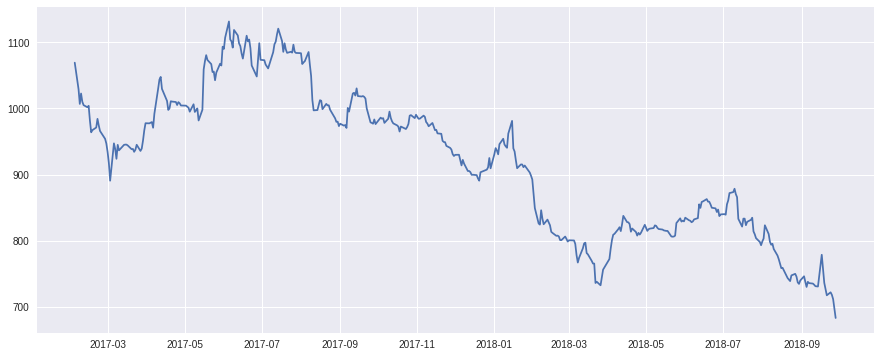

In [27]:
plt.plot(ts)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


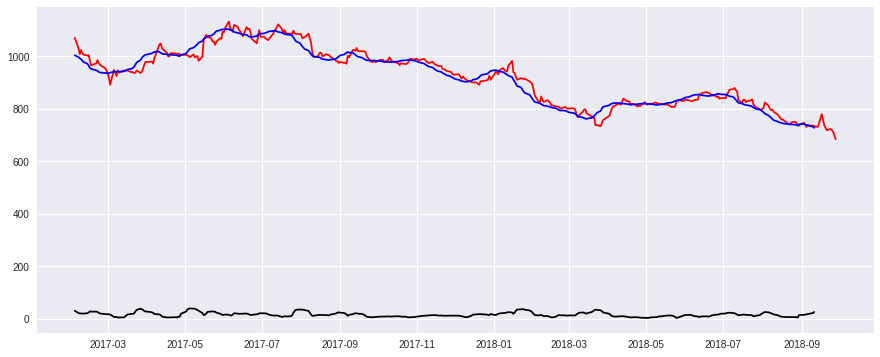

In [31]:
rolmean = pd.rolling_mean(ts,window=12)
rolstd = pd.rolling_std(ts,window=12)
plt.plot(ts,label='original',color='red')
plt.plot(rolmean,label='rolling_mean',color='blue')
plt.plot(rolstd,label='rolling_std',color='black')

make time series stationary

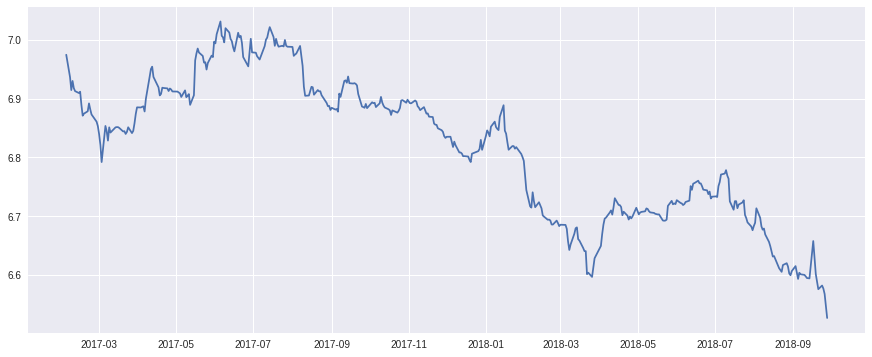

In [32]:
ts_log = np.log(ts)
plt.plot(ts_log)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


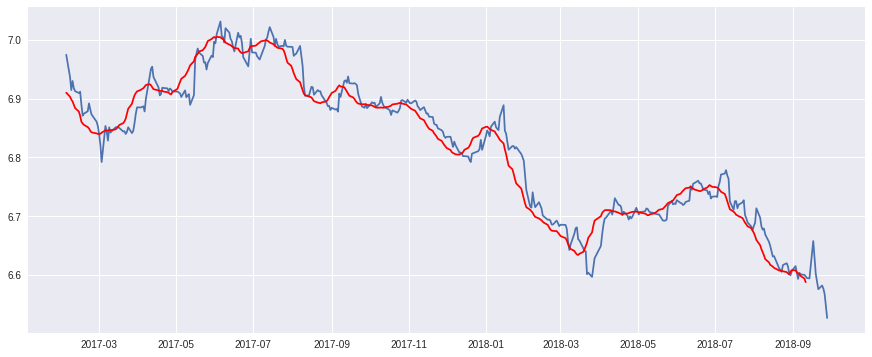

In [33]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [34]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2018-09-28         NaN
2018-09-27         NaN
2018-09-26         NaN
2018-09-25         NaN
2018-09-24         NaN
2018-09-21         NaN
2018-09-19         NaN
2018-09-18         NaN
2018-09-17         NaN
2018-09-14         NaN
2018-09-12         NaN
2018-09-11    0.010028
Name: Close, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  after removing the cwd from sys.path.


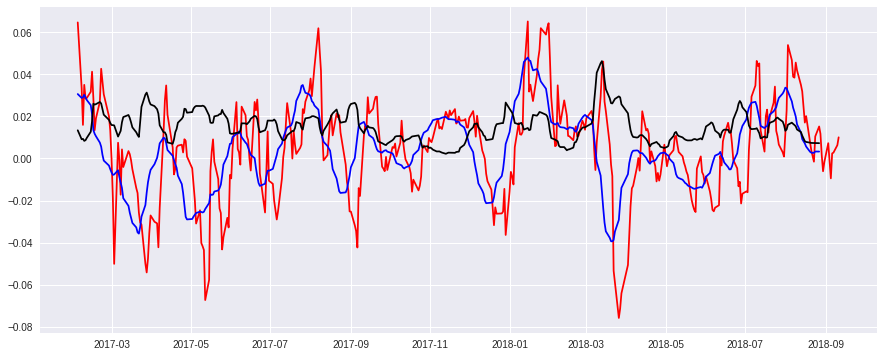

In [36]:
ts_log_moving_avg_diff.dropna(inplace=True)
#test_stationarity(ts_log_moving_avg_diff)
rolmean = pd.rolling_mean(ts_log_moving_avg_diff,window=12)
rolstd = pd.rolling_std(ts_log_moving_avg_diff,window=12)
plt.plot(ts_log_moving_avg_diff,label='original',color='red')
plt.plot(rolmean,label='rolling_mean',color='blue')
plt.plot(rolstd,label='rolling_std',color='black')

implementing weighted moving average specially for stock prices 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


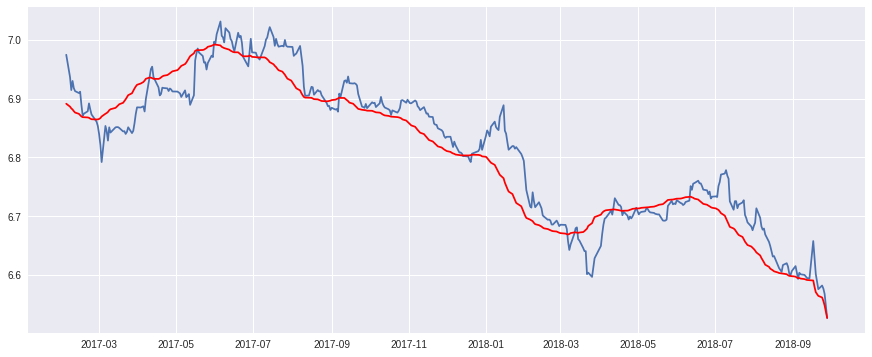

In [38]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


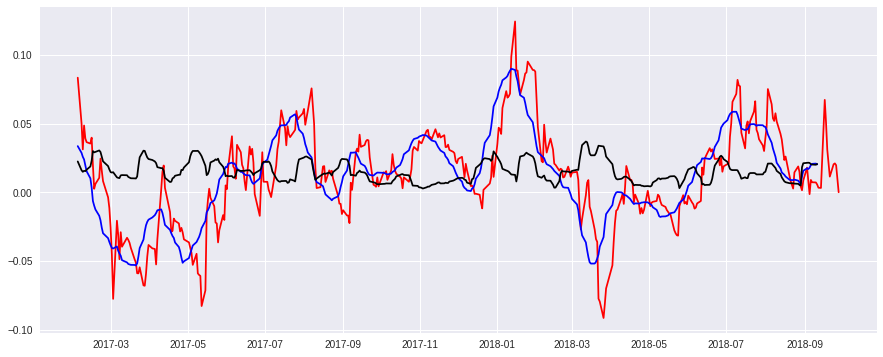

In [40]:
ts_log_ewma_diff = ts_log - expwighted_avg
rolmean = pd.rolling_mean(ts_log_ewma_diff,window=12)
rolstd = pd.rolling_std(ts_log_ewma_diff,window=12)
plt.plot(ts_log_ewma_diff,label='original',color='red')
plt.plot(rolmean,label='rolling_mean',color='blue')
plt.plot(rolstd,label='rolling_std',color='black')

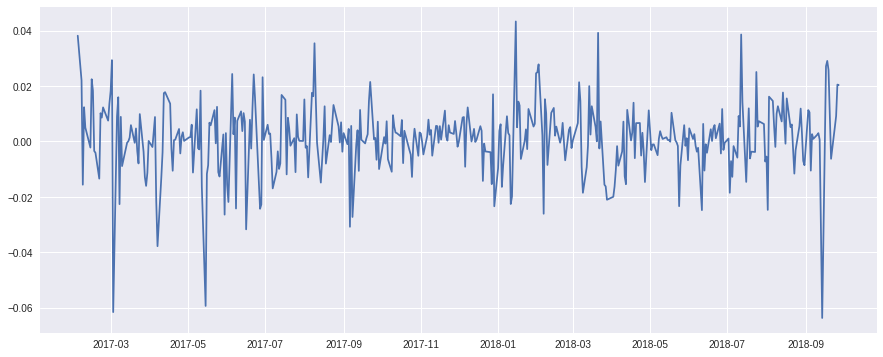

In [41]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


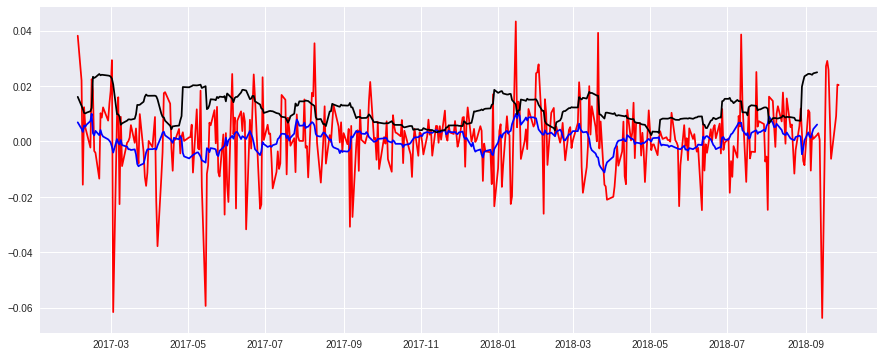

In [42]:
ts_log_diff.dropna(inplace=True)
rolmean = pd.rolling_mean(ts_log_diff,window=12)
rolstd = pd.rolling_std(ts_log_diff,window=12)
plt.plot(ts_log_diff,label='original',color='red')
plt.plot(rolmean,label='rolling_mean',color='blue')
plt.plot(rolstd,label='rolling_std',color='black')

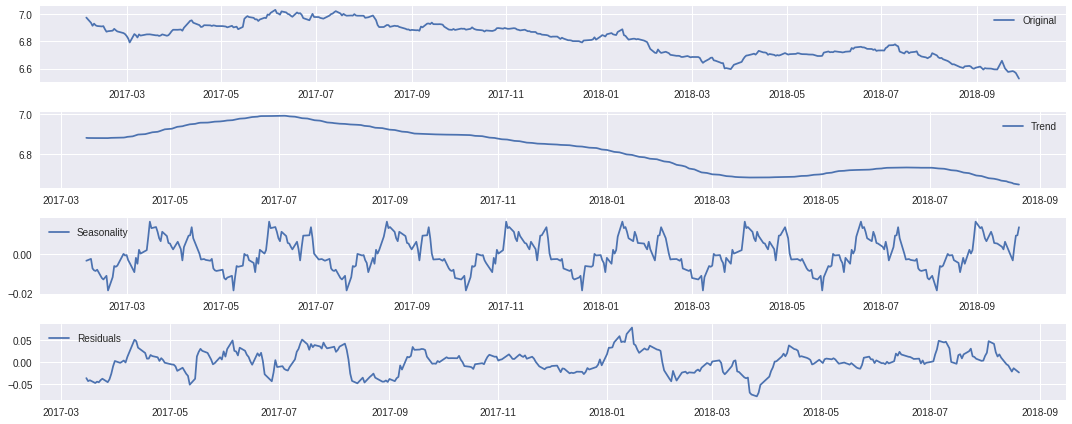

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=52)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  after removing the cwd from sys.path.


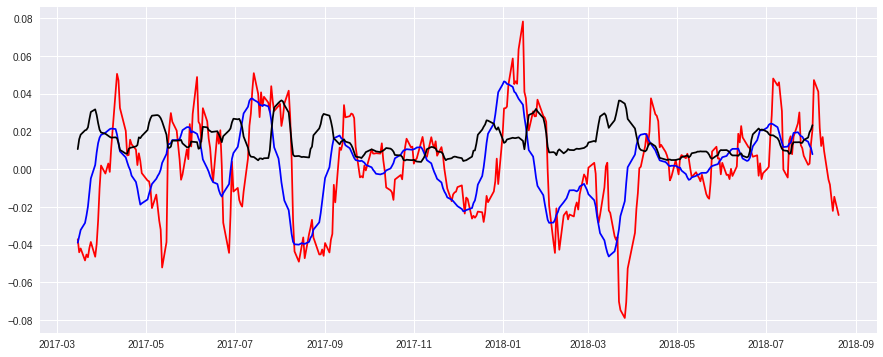

In [46]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
rolmean = pd.rolling_mean(ts_log_decompose,window=12)
rolstd = pd.rolling_std(ts_log_decompose,window=12)
plt.plot(ts_log_decompose,label='original',color='red')
plt.plot(rolmean,label='rolling_mean',color='blue')
plt.plot(rolstd,label='rolling_std',color='black')

ARIMA 

In [0]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

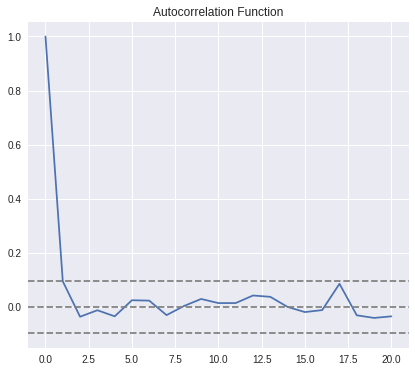

In [52]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

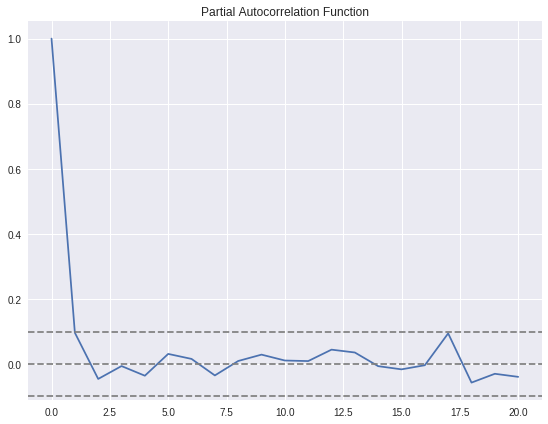

In [53]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [0]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5, 1.0, 'RSS: 0.0655')

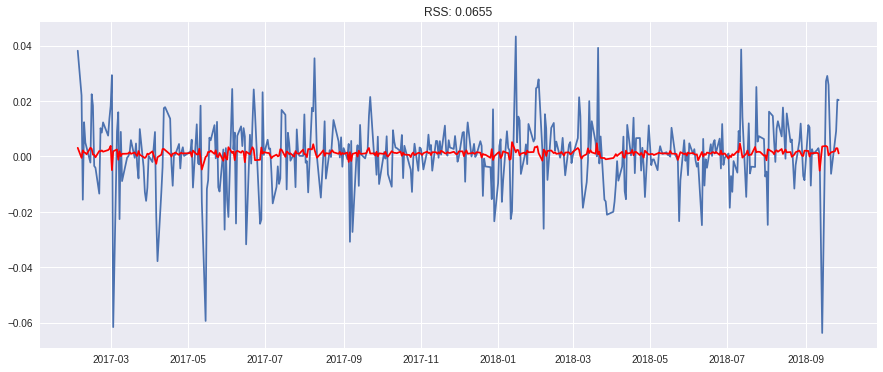

In [54]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5, 1.0, 'RSS: 0.0654')

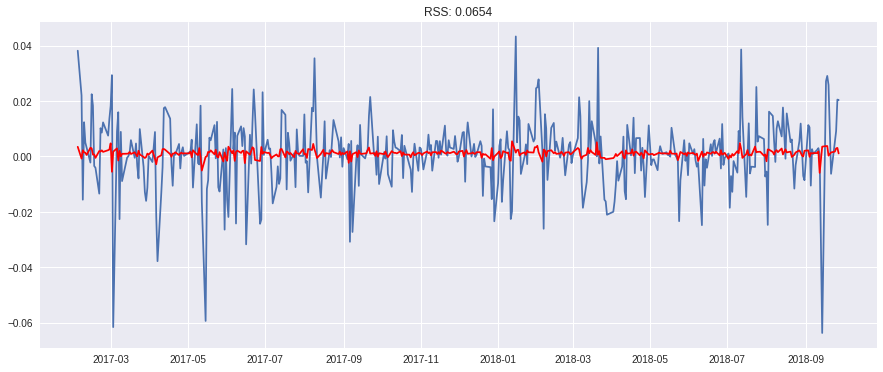

In [57]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5, 1.0, 'RSS: 0.0654')

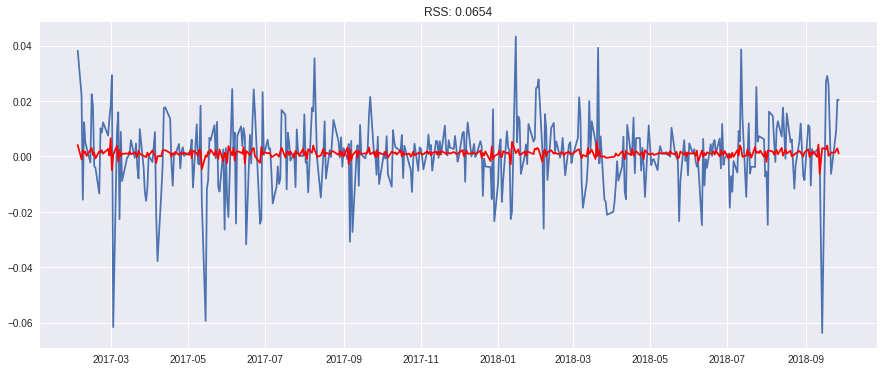

In [58]:
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [60]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2018-09-27    0.001102
2018-09-26    0.002932
2018-09-25    0.002213
2018-09-24    0.001413
2018-09-21    0.001374
dtype: float64

In [62]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2018-09-27    0.001102
2018-09-26    0.004034
2018-09-25    0.006246
2018-09-24    0.007659
2018-09-21    0.009033
dtype: float64

In [63]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2017-02-03    6.975360
2017-02-06    6.971214
2017-02-07    6.972256
2017-02-08    6.970084
2017-02-09    6.968859
dtype: float64

In [64]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2017-02-03    6.975360
2017-02-06    6.971214
2017-02-07    6.972256
2017-02-08    6.970084
2017-02-09    6.968859
dtype: float64

Text(0.5, 1.0, 'RMSE: 80.8023')

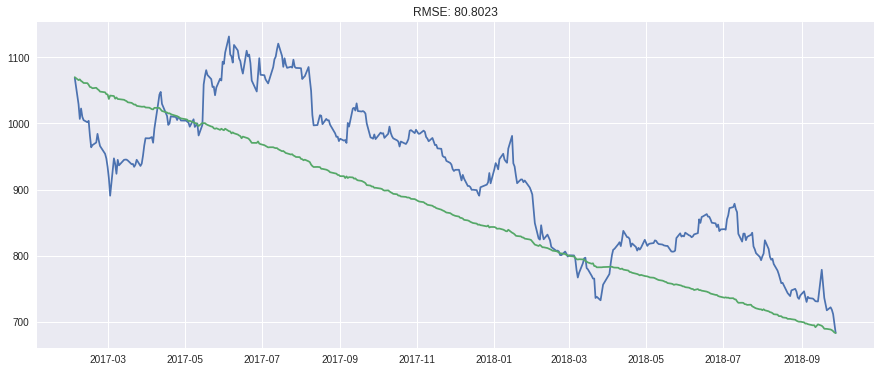

In [65]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))